bionomial distribution = 

In [3]:
import math 

fifty_fifty = math.comb(100, 50)
chance = fifty_fifty * (0.5**50) * (0.5**50)
chance

0.07958923738717877

In [6]:
import math
def coin_bet_probability_calculator(total_round, win_rounds, win_rate):
    combination = math.comb(total_round, win_rounds)
    chance = combination * (win_rate**win_rounds) * ((1-win_rate)**(total_round-win_rounds))
    return f'probability: {chance*100}%'
coin_bet_probability_calculator(100,55,0.5)
    

'probability: 4.8474296626430755%'

$$C_{100}^{50} \times (0.5)^{50} \times (0.5)^{50}$$


$C_{100}^{50}$ = 玩$100$次有 $50$ 個位子贏 $50$ 個位子輸， 可能的組合有 $C_{100}^{50}$ 個 <br>
贏的機率 $50\% $ <br>
贏的機率 $50\% $ <br>
總共贏$50$次 輸$50$次 所以排列的機率是 $(50\% )^{50} \times(50\% )^{50}$


In [7]:
coin_bet_probability_calculator(100,50,0.5)

'probability: 7.958923738717877%'

$$C_{100}^{55} \times (0.5)^{55} \times (0.5)^{45}$$


In [8]:
coin_bet_probability_calculator(100,55,0.5)

'probability: 4.8474296626430755%'

$$C_{100}^{90} \times (0.5)^{90} \times (0.5)^{10}$$


In [9]:
coin_bet_probability_calculator(100,90,0.5)

'probability: 1.36554263874631e-15%'

<h1>期望淨利</h1> 


$$p\times b + (1-p) \times {-1}$$
簡化：
$$p(1＋b)-1$$
## if $p (1 + b) - 1 > 0$ = 有利可圖




In [60]:
def expect_return_calculator(p, b):
    """
    Calculate the expression p * (1 + b) - 1.

    Parameters:
    p (float): Probability or coefficient factor.
    b (float): The additional multiplier factor.

    Returns:
    float: Result of the expression.
    """
    return p * (1 + b) - 1

# Example usage
result = expect_return_calculator(0.0000001, 20000000000)
print("The expect_return is:", result)


The expect_return is: 1999.0000000999999


## 一次只下注$f$比例資金的情況

### Simplification of the Function

Consider the function:

$$
p \times (1 + bf) + (1 - p) \times (1 - f)
$$

We aim to simplify this expression step-by-step:

#### Step 1: Expand each term

$$
p \times (1 + bf) + (1 - p) \times (1 - f) = p + pbf+ 1 - p - f + pf
$$


#### Step 2: Factor out \( f \) from the terms involving it

Factor \( f \) to consolidate terms:

$$
1 + f(pf + pb - 1)
$$

#### Final Simplified Form

Rewrite to emphasize the role of each parameter on \( f \):

$$
1 + f(p(b + 1) - 1)
$$

This is the final simplified expression, showing how each component \( p \), \( b \), and \( f \) influences the overall expression.


In [9]:
def expect_return_calculator_with_f(p, b, f):
    return 1 + f * (p * (b + 1) - 1)


expect_return_calculator_with_f(0.5, 2, 0.2)


1.1

## 一次下注$f$比例資金的情況，下注$T$次的期望值


## if T=2


For \( T = 2 \) (i.e., two flips), we can have the following outcomes:
- \( HH \): Heads on the first flip, heads on the second flip
- \( HT \): Heads on the first flip, tails on the second flip
- \( TH \): Tails on the first flip, heads on the second flip
- \( TT \): Tails on the first flip, tails on the second flip

so the expected value of HT and TH will be
$$C_{1}^{2} \times (0.5)^{1} \times (0.5)^{1} \times (1 + bf) \times(1 - f)$$ 

so the expected value of TT and HH will be
$$C_{0}^{2} \times (0.5)^{2} \times (1 + bf) \times (1 - f)$$ 
or
$$C_{2}^{2} \times (0.5)^{2} \times (1 + bf) \times (1 - f)$$

the overall expected value
$$\sum_{k=0}^{2}C_{k}^{2} \times (p)^{k} \times (1-p)^{2-k} \times (1 + bf)^{k} \times (1 - f)^{2-k}$$ 



## if T=T

$$\sum_{k=0}^{T}C_{k}^{T} \times (p)^{k} \times (1-p)^{T-k} \times (1 + bf)^{k} \times (1 - f)^{T-k}$$ 

In [43]:
from math import comb

def calculate_expect_return_with_T_times(T, p, b, f):
    result = 0
    for k in range(T + 1):
        binom = comb(T, k)  # Binomial coefficient
        p_term = (p ** k) * ((1 - p) ** (T - k))
        b_term = (1 + b*f) ** k
        f_term = (1 - f) ** (T - k)
        result += binom * p_term * b_term * f_term
    return result

# Example usage:
T = 2  # Total number of trials
p = 0.5  # Probability of success
b = 2  # bet ratio 
f = 0.5  # percentage of investment

result = calculate_expect_return_with_T_times(T, p, b, f)
print(f"The calculated result is: {result}")


The calculated result is: 1.5625


In [26]:
T = 1  # Total number of trials
p = 0.5  # Probability of success
b = 2  # bet ratio 
f = 1  # percentage of investment

result = calculate_expect_return_with_T_times(T, p, b, f)
print(f"The calculated result is: {result}")

The calculated result is: 1.5


In [45]:
T = 2  # Total number of trials
p = 0.5  # Probability of success
b = 2  # bet ratio 
f = 0.5  # percentage of investment

result = calculate_expect_return_with_T_times(T, p, b, f)
print(f"The calculated result is: {result}")

The calculated result is: 1.5625


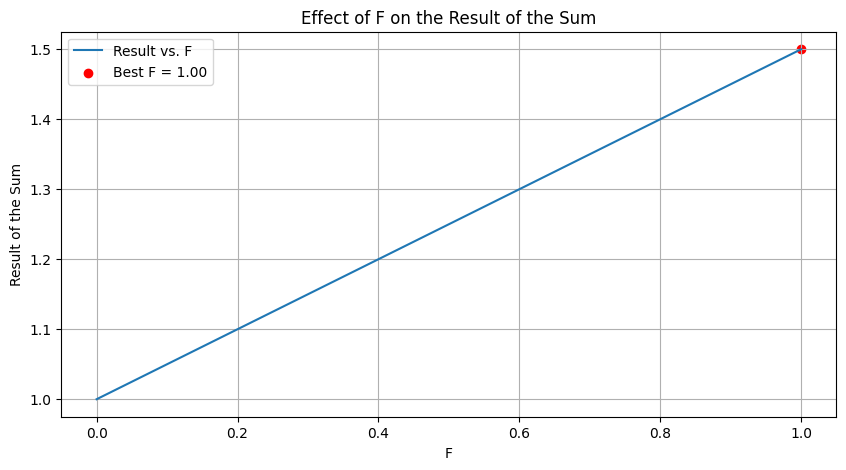

The best value of F is: 1.00, with a maximum EACG of 1.5


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb
def find_best_F_and_plot(T, p, b, num_points=100):
    f_range = np.linspace(0, 1, num_points)
    best_f = None
    max_result = -np.inf
    results = []

    for f in f_range:
        result = calculate_expect_return_with_T_times(T, p, b, f)
        results.append(result)
        if result > max_result:
            max_result = result
            best_f = f

    # Plotting the results
    plt.figure(figsize=(10, 5))
    plt.plot(f_range, results, label='Result vs. F')
    plt.scatter([best_f], [max(results)], color='red', label=f'Best F = {best_f:.2f}')
    plt.title('Effect of F on the Result of the Sum')
    plt.xlabel('F')
    plt.ylabel('Result of the Sum')
    plt.legend()
    plt.grid(True)
    plt.show()

    return best_f, max_result

# Usage example
T = 1
p = 0.5
b = 2
best_f, max_result = find_best_F_and_plot(T, p, b)
print(f"The best value of F is: {best_f:.2f}, with a maximum EACG of {max_result}")

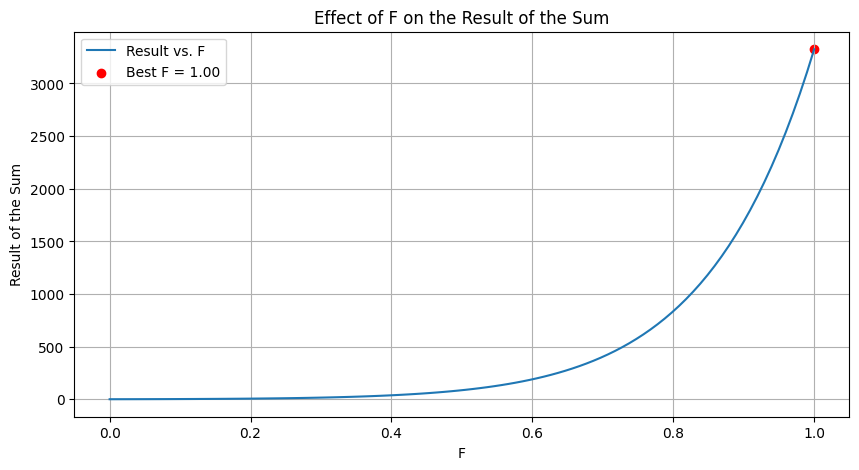

The best value of F is: 1.00, with a maximum AECG of 3325.256730079651


In [37]:
T = 20
p = 0.5
b = 2
best_f, max_result = find_best_F_and_plot(T, p, b)
print(f"The best value of F is: {best_f:.2f}, with a maximum EACG of {max_result}")

## best F always = 100%, why?

## in real life, if we always bet 100% we will likely to be bankrupt
上述的方法是將所有的情況的報酬加總做平均，但在現實世界我們只有一次機會 我們不是奇異博士

## 所以我們應該將每一步的損益反映在資金上，先幾何平均，再算術平均

## $T=2$

WW:
$$(1 + bf)(1 + bf)^{\frac{1}{2}}$$
WL:
$$(1 + bf)(1 - f)^{\frac{1}{2}}$$
LW:
$$(1 -f)(1 + bf)^{\frac{1}{2}}$$
LL:
$$(1 - f)(1 - f)^{\frac{1}{2}}$$

## 加總起來
$$(1 + bf)(1 + bf)^{\frac{1}{2}} +(1 + bf)(1 - f)^{\frac{1}{2}} +(1 + bf)(1 - f)^{\frac{1}{2}}+(1 - f)(1 - f)^{\frac{1}{2}}$$

In [48]:
def calculate_simple_EACG(b,f):
    term1 = (1 + b*f) * math.sqrt(1 + b*f)
    term2 = (1 + b*f) * math.sqrt(1 - f)
    term3 = (1 + b*f) * math.sqrt(1 - f)
    term4 = (1 - f) * math.sqrt(1 - f)
    return term1 + term2 + term3 + term4

# Example usage:
b = 0.5  # Replace with your value for b
f = 0.3  # Replace with your value for f
result = calculate_simple_EACG(b, f)
print(result)



3.7432176885000414


## general version T=T

$$\sum_{k=0}^{T}C_{k}^{T} \times (p)^{k} \times (1-p)^{T-k} \times [(1 + bf)^{k} \times (1 - f)^{T-k}]^{\frac{1}{T}}$$ 
 note that we add $[ ]^\frac{1}{T}$

In [55]:
def calculate_EACG(T, b, f, p):
    result = 0
    for k in range(T + 1):
        binomial_coeff = math.comb(T, k)
        prob_component = (p ** k) * ((1 - p) ** (T - k))
        inside_bracket = ((1 + b * f) ** k) * ((1 - f) ** (T - k))
        term = binomial_coeff * prob_component * (inside_bracket ** (1 / T))
        result += term
    return result

# Example usage:
T = 2  # Total number of trials
p = 0.5  # Probability of success
b = 2  # bet ratio 
f = 0.5  # percentage of investment
result = calculate_EACG(T, b, f, p)
print(result)

1.125


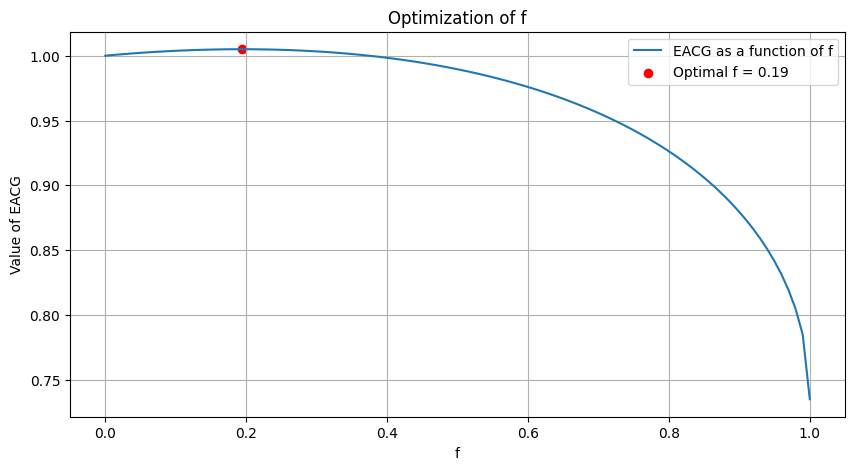

The best f value is: 0.19


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import comb
import math

# Function to calculate the sum, renamed as calculate_EACG
def calculate_EACG(f, T, b, p):
    result = 0
    for k in range(T + 1):
        binomial_coeff = comb(T, k)
        prob_component = (p ** k) * ((1 - p) ** (T - k))
        inside_bracket = ((1 + b * f) ** k) * ((1 - f) ** (T - k))
        term = binomial_coeff * prob_component * (inside_bracket ** (1 / T))
        result += term
    return result

# Objective function to be minimized (use -calculate_EACG for maximization)
def objective(f, T, b, p):
    return -calculate_EACG(f, T, b, p)

# Function to optimize f and plot the results
def optimize_and_plot(T, b, p):
    # Range of f values from 0 to 1 (0% to 100%)
    f_values = np.linspace(0, 1, 100)
    results = []

    # Calculate the EACG for each value of f
    for f in f_values:
        result = calculate_EACG(f, T, b, p)
        results.append(result)

    # Use scipy's minimize function to find the best f
    optimal_result = minimize(objective, x0=0.5, args=(T, b, p), bounds=[(0, 1)])
    best_f = optimal_result.x[0]

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(f_values, results, label='EACG as a function of f')
    plt.scatter(best_f, calculate_EACG(best_f, T, b, p), color='red', label=f'Optimal f = {best_f:.2f}')
    plt.title('Optimization of f')
    plt.xlabel('f')
    plt.ylabel('Value of EACG')
    plt.legend()
    plt.grid(True)
    plt.show()

    return best_f

# Example usage:
T = 2  # The upper limit of the sum
b = 0.5  # Example value for b
p = 0.7  # Example value for p
best_f = optimize_and_plot(T, b, p)
print(f"The best f value is: {best_f:.2f}")
